In [1]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics

/local/data/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/local/data/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_target='npyufunc',
/local/data/anaconda3/envs/BT/lib/python3.11/site-pac

In [2]:
adata = sc.read(
    "data/Immune_ALL_human.h5ad"
)

In [3]:
adata

AnnData object with n_obs × n_vars = 33506 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

In [4]:
scanoramaPredict(adata)

Found 12303 genes among all datasets
[[0.00000000e+00 8.48521064e-02 1.02474865e-01 3.98162328e-03
  2.17158177e-02 3.36231884e-02 8.32967996e-03 4.16146484e-03
  4.28824462e-03 3.92367906e-01]
 [0.00000000e+00 0.00000000e+00 5.07917538e-03 0.00000000e+00
  2.41286863e-03 6.57391304e-01 1.97281894e-01 3.60382855e-01
  2.46489393e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.92807425e-01
  8.85924207e-01 4.63768116e-03 2.63042525e-03 4.99375780e-03
  1.65289256e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.15007657e-01 4.05797101e-03 2.63042525e-03 4.16146484e-04
  8.26446281e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.65217391e-02 6.57606313e-03 1.83104453e-02
  9.38337802e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.16231884e-01 3.68115942e-01
  2.68985507e-01 0.00000000e+00]
 [0.00000000e+00 0.00

In [5]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal", max_epochs = 50)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:55<00:00,  2.32s/it, v_num=1, train_loss_step=5.58e+3, train_loss_epoch=4.81e+3]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:55<00:00,  2.32s/it, v_num=1, train_loss_step=5.58e+3, train_loss_epoch=4.81e+3]


In [6]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus", max_epochs = 50)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [02:11<00:00,  2.67s/it, v_num=1, train_loss_step=4.37e+3, train_loss_epoch=4.8e+3] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [02:11<00:00,  2.62s/it, v_num=1, train_loss_step=4.37e+3, train_loss_epoch=4.8e+3]


In [7]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp", max_epochs = 50)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [02:33<00:00,  3.09s/it, v_num=1, train_loss_step=4.72e+3, train_loss_epoch=4.8e+3] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [02:33<00:00,  3.07s/it, v_num=1, train_loss_step=4.72e+3, train_loss_epoch=4.8e+3]


In [8]:
allAdata = sdnormalAdata.copy()
allAdata.obsm["scVISD"] = sdnormalAdata.obsm["scVI"]
allAdata.obsm["scVIMG"] = mogAdata.obsm["scVI"]
allAdata.obsm["scVIVAMP"] = vampAdata.obsm["scVI"]

In [9]:
plotBenchmarkResults(allAdata,keys = ["Scanorama","scVISD","scVIMG","scVIVAMP"],label_key="final_annotation")

Embeddings:   0%|          | 0/4 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 3 batches per label


: 

: 

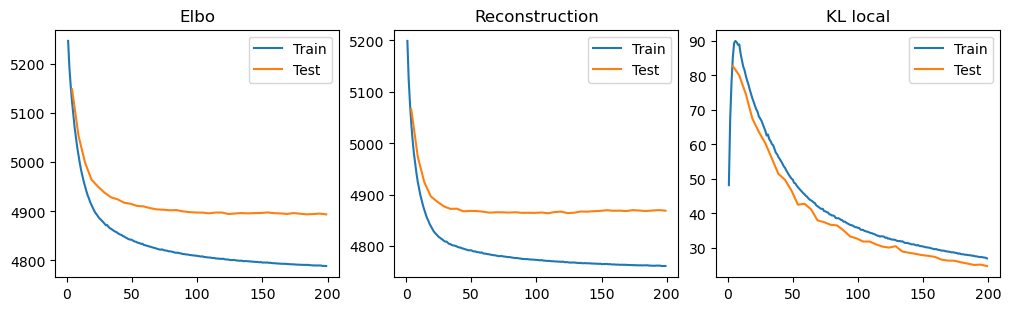

In [20]:
plotAllHistory(vaeSD)

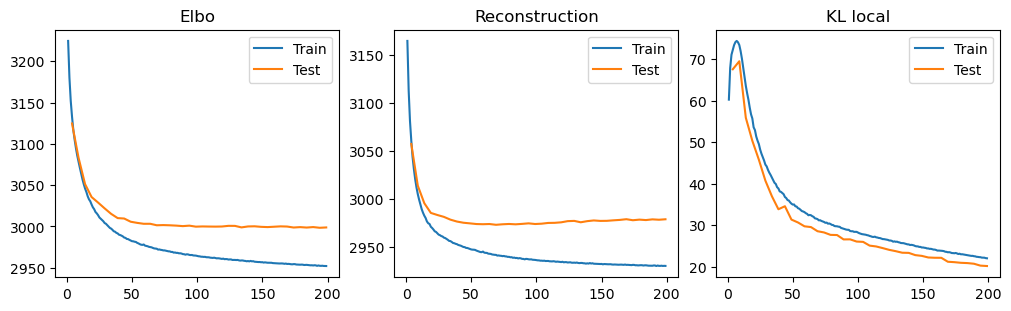

In [21]:
plotAllHistory(vaeMG)

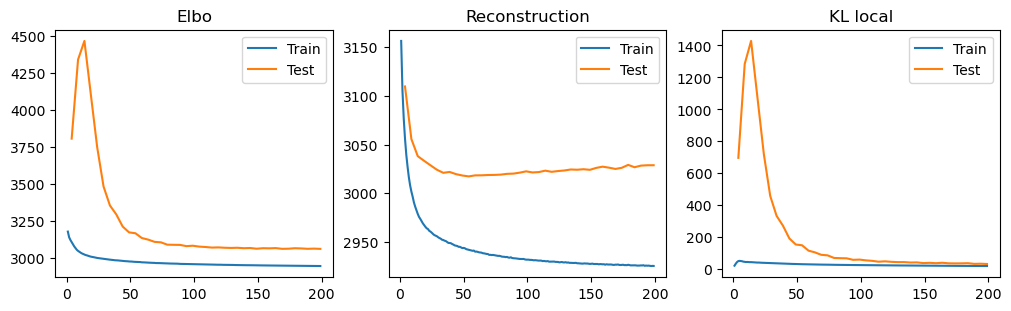

In [22]:
plotAllHistory(vaeVP)